# Data Cleaning and EDA
<hr>


#### Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy.stats import gamma

import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk

<hr>

#### Read Dataset

In [2]:
df = pd.read_excel('dataset/vgsales.xlsx')

In [3]:
df.head()

,Name,Genre,Platform,Publisher,Developer,Vgchartz_Score,Critic_Score,User_Score,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Release_Date,Last_Update
0,Mario Party,Party,Series,Nintendo,Hudson Soft|Capcom|NDcube,NaN,NaN,NaN,51860000.0,NaN,NaN,NaN,NaN,NaN,1999-02-01,2020-02-18
1,Wii Play,Party,Series,Nintendo,Nintendo|Arzest|Chunsoft|Good-Feel|Mitchell Co...,NaN,NaN,NaN,29660000.0,NaN,NaN,NaN,NaN,NaN,2007-02-12,2020-02-20
2,Kinect Adventures!,Party,X360,Microsoft Game Studios,Good Science Studio,6.2,6.7,NaN,24000000.0,NaN,NaN,NaN,NaN,NaN,2010-11-04,2018-09-29
3,Wii Party,Party,Series,Nintendo,NDcube|Nintendo,NaN,NaN,NaN,11120000.0,NaN,NaN,NaN,NaN,NaN,2010-10-03,2020-02-19
4,Super Mario Party,Party,NS,Nintendo,"Nd Cube Co., Ltd.",7.0,7.3,NaN,10100000.0,NaN,NaN,NaN,NaN,NaN,2018-10-05,2018-11-19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48270 entries, 0 to 48269
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            48270 non-null  object        
 1   Genre           48270 non-null  object        
 2   Platform        48270 non-null  object        
 3   Publisher       48270 non-null  object        
 4   Developer       48256 non-null  object        
 5   Vgchartz_Score  928 non-null    float64       
 6   Critic_Score    6201 non-null   float64       
 7   User_Score      378 non-null    float64       
 8   Total_Shipped   2197 non-null   float64       
 9   Total_Sales     17058 non-null  float64       
 10  NA_Sales        11652 non-null  float64       
 11  PAL_Sales       11907 non-null  float64       
 12  JP_Sales        6097 non-null   float64       
 13  Other_Sales     13915 non-null  float64       
 14  Release_Date    45503 non-null  datetime64[ns]
 15  La

#### Their fields and data types are: 

- **Name** - The games title, object

- **Genre** - Genre of the game, object

- **Platform** - Platform of the game released (i.e. PC,PS4, etc.), object

- **Developer** - Developer of the game, object

- **Vgchartz_Score** - Aggregate score compiled by Vgchartz staff, float

- **Critic_Score** - Aggregate score compiled by Indepdent Games Sites, float

- **User_Score** - Aggregate score compiled by Gamers, float

- **Total_Shipped** - Total shipments from manufacturers, float

- **Total_Sales** - Total worldwide sales, float

- **NA_Sales** - Sales in North America (in millions), float

- **PAL_Sales** - Sales in Asia, Europe, Argentina, Brazil, and Paraguay (in millions), float

- **JP_Sales** - Sales in Japan (in millions), float

- **Other_Sales** - Sales in the rest of the world, i.e. Nigeria (in millions), float

- **Release Date** - Date of the game's release, datetime

- **Last Update** - Time the game was last updated, datetime

In [5]:
print(f"VGChartz number of rows and columns: {df.shape}")

VGChartz number of rows and columns: (48270, 16)


In [6]:
df.describe()

,Vgchartz_Score,Critic_Score,User_Score,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
count,928.000000,6201.000000,378.000000,2.197000e+03,1.705800e+04,1.165200e+04,1.190700e+04,6.097000e+03,1.391500e+04
mean,7.248815,7.232672,8.127249,5.358757e+06,3.747280e+05,2.758333e+05,1.560309e+05,1.138904e+05,4.469781e+04
std,1.422564,1.448652,1.589412,2.085084e+07,8.529292e+05,5.171804e+05,4.071137e+05,1.877231e+05,1.306887e+05
min,1.000000,1.000000,1.000000,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.400000,6.500000,7.525000,2.000000e+05,4.000000e+04,5.000000e+04,1.000000e+04,2.000000e+04,0.000000e+00
50%,7.500000,7.500000,8.500000,9.100000e+05,1.300000e+05,1.200000e+05,4.000000e+04,5.000000e+04,1.000000e+04
75%,8.300000,8.300000,9.100000,2.800000e+06,3.800000e+05,2.900000e+05,1.400000e+05,1.300000e+05,4.000000e+04
max,9.600000,10.000000,10.000000,3.656000e+08,2.032000e+07,9.760000e+06,9.850000e+06,2.690000e+06,3.120000e+06


In [7]:
df.head()

,Name,Genre,Platform,Publisher,Developer,Vgchartz_Score,Critic_Score,User_Score,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Release_Date,Last_Update
0,Mario Party,Party,Series,Nintendo,Hudson Soft|Capcom|NDcube,NaN,NaN,NaN,51860000.0,NaN,NaN,NaN,NaN,NaN,1999-02-01,2020-02-18
1,Wii Play,Party,Series,Nintendo,Nintendo|Arzest|Chunsoft|Good-Feel|Mitchell Co...,NaN,NaN,NaN,29660000.0,NaN,NaN,NaN,NaN,NaN,2007-02-12,2020-02-20
2,Kinect Adventures!,Party,X360,Microsoft Game Studios,Good Science Studio,6.2,6.7,NaN,24000000.0,NaN,NaN,NaN,NaN,NaN,2010-11-04,2018-09-29
3,Wii Party,Party,Series,Nintendo,NDcube|Nintendo,NaN,NaN,NaN,11120000.0,NaN,NaN,NaN,NaN,NaN,2010-10-03,2020-02-19
4,Super Mario Party,Party,NS,Nintendo,"Nd Cube Co., Ltd.",7.0,7.3,NaN,10100000.0,NaN,NaN,NaN,NaN,NaN,2018-10-05,2018-11-19


<hr>

## Data Cleaning

#### Lowercase column name

In [8]:
df.columns = df.columns.map(lambda x: x.lower())

#### Check for all missing values 

In [9]:
print(df.isnull().sum())

name                  0
genre                 0
platform              0
publisher             0
developer            14
vgchartz_score    47342
critic_score      42069
user_score        47892
total_shipped     46073
total_sales       31212
na_sales          36618
pal_sales         36363
jp_sales          42173
other_sales       34355
release_date       2767
last_update       37381
dtype: int64


#### Convert  <span style="color: red">'date'</span> to day, month and year

In [10]:
df.date = pd.to_datetime(df.release_date)
df['release_month']=df['release_date'].apply(lambda x: x.to_pydatetime().month)
df['release_year']=df['release_date'].apply(lambda x: x.to_pydatetime().year)
df['release_day_of_week']=df['release_date'].apply(lambda x: x.to_pydatetime().weekday())
df['release_day']=df['release_date'].apply(lambda x: x.to_pydatetime().day)

/Users/raychia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


#### Filtering out those data that has null values in Release Date column

In [11]:
df = df[df.release_date.notnull()]
print(f"VGChartz number of rows and columns: {df.shape}")
print(f"Columns with null values:\n{df.isnull().sum()}")

VGChartz number of rows and columns: (45503, 20)
Columns with null values:
name                       0
genre                      0
platform                   0
publisher                  0
developer                  9
vgchartz_score         44691
critic_score           39324
user_score             45137
total_shipped          43722
total_sales            28514
na_sales               33863
pal_sales              33628
jp_sales               39443
other_sales            31627
release_date               0
last_update            35952
release_month              0
release_year               0
release_day_of_week        0
release_day                0
dtype: int64


#### Drop Total Shipped column since all is NaN 

In [12]:
df = df.drop('total_shipped', 1)

#### Fill Nan / 0 in missing values

In [13]:
# Fill NaN with 0
df.fillna( {
    'vgchartz_score': 0,
    'jp_sales': 0,
    'na_sales': 0,
    'pal_sales': 0,
    'other_sales': 0,
    'critic_score': 0,
    'user_score': 0} , inplace=True)

# Fill NaN with NA
df.fillna( {
    'last_update': 'NA',
    'developer': 'NA'} , inplace=True)

#### Totaling up all sales per region (For modeling)


In [14]:
df['total_sales'] = df['na_sales'] + df['pal_sales'] + df['jp_sales'] + df['other_sales']

In [15]:
df =  df[df['total_sales'] > 0]
print(f"VGChartz number of rows and columns: {df.shape}")

VGChartz number of rows and columns: (15775, 19)


In [16]:
df.to_excel('dataset/vgsales_cleaned.xlsx', index=False)

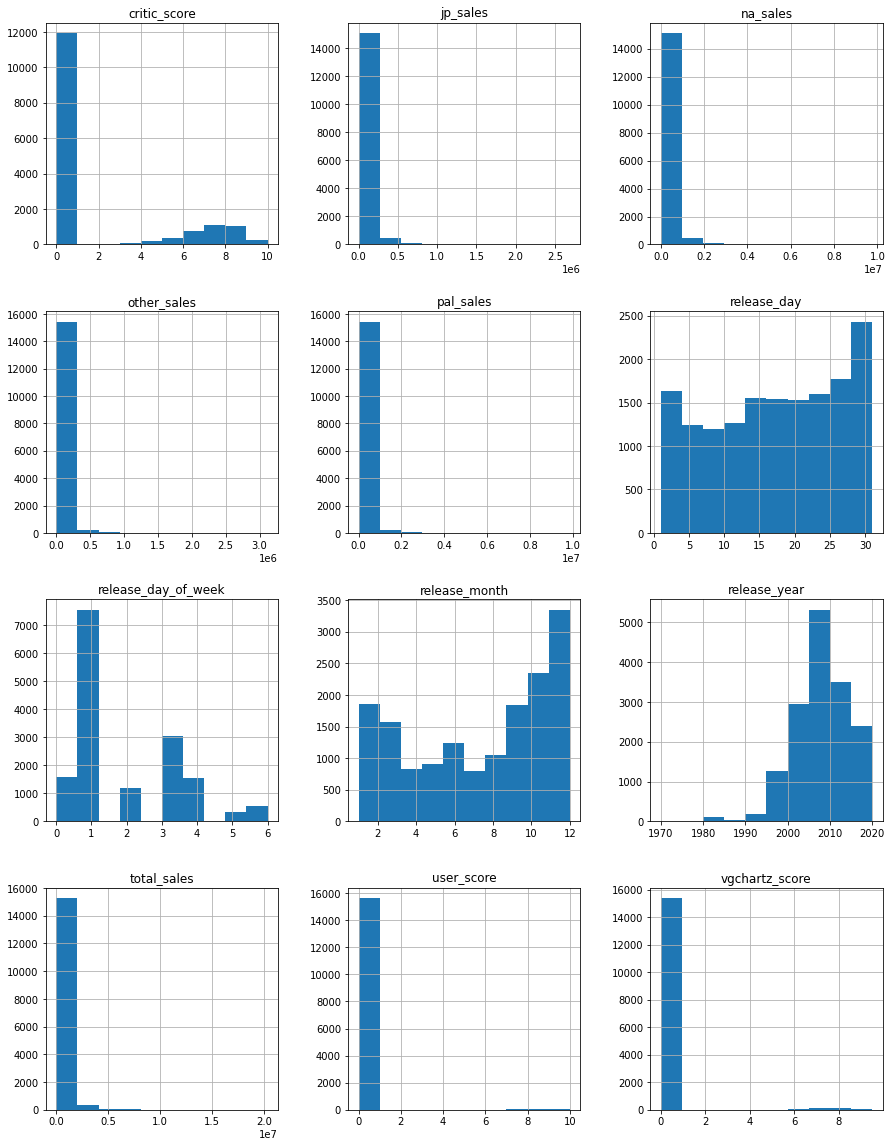

In [17]:
df.hist(figsize=(15, 20));

<hr>

## EDA

#### Relations of columns

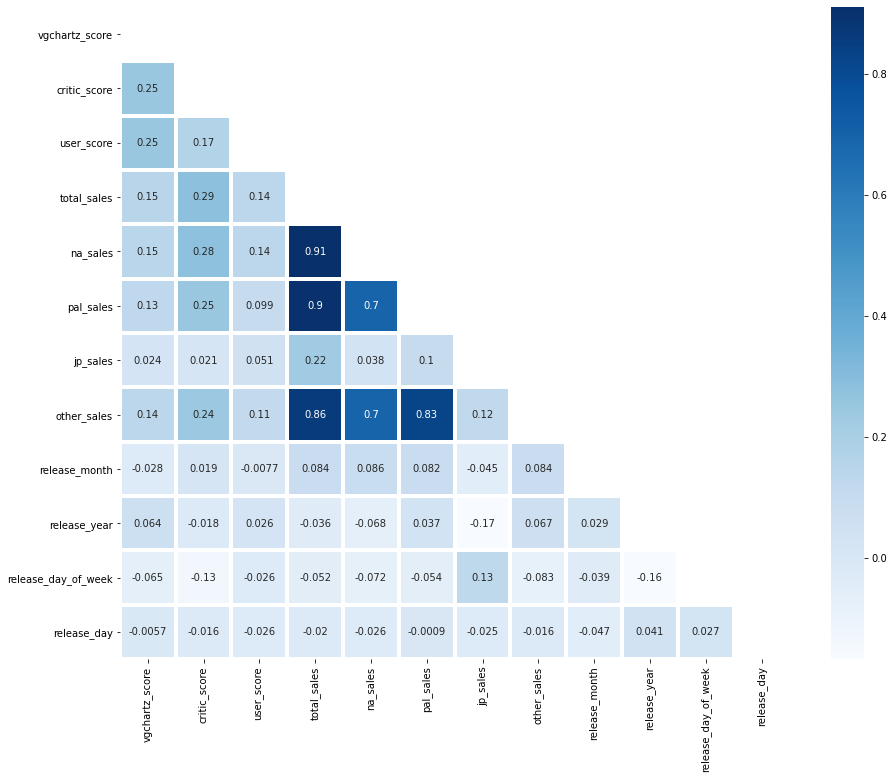

In [18]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap = "Blues", mask=mask,annot=True, linewidth=3)

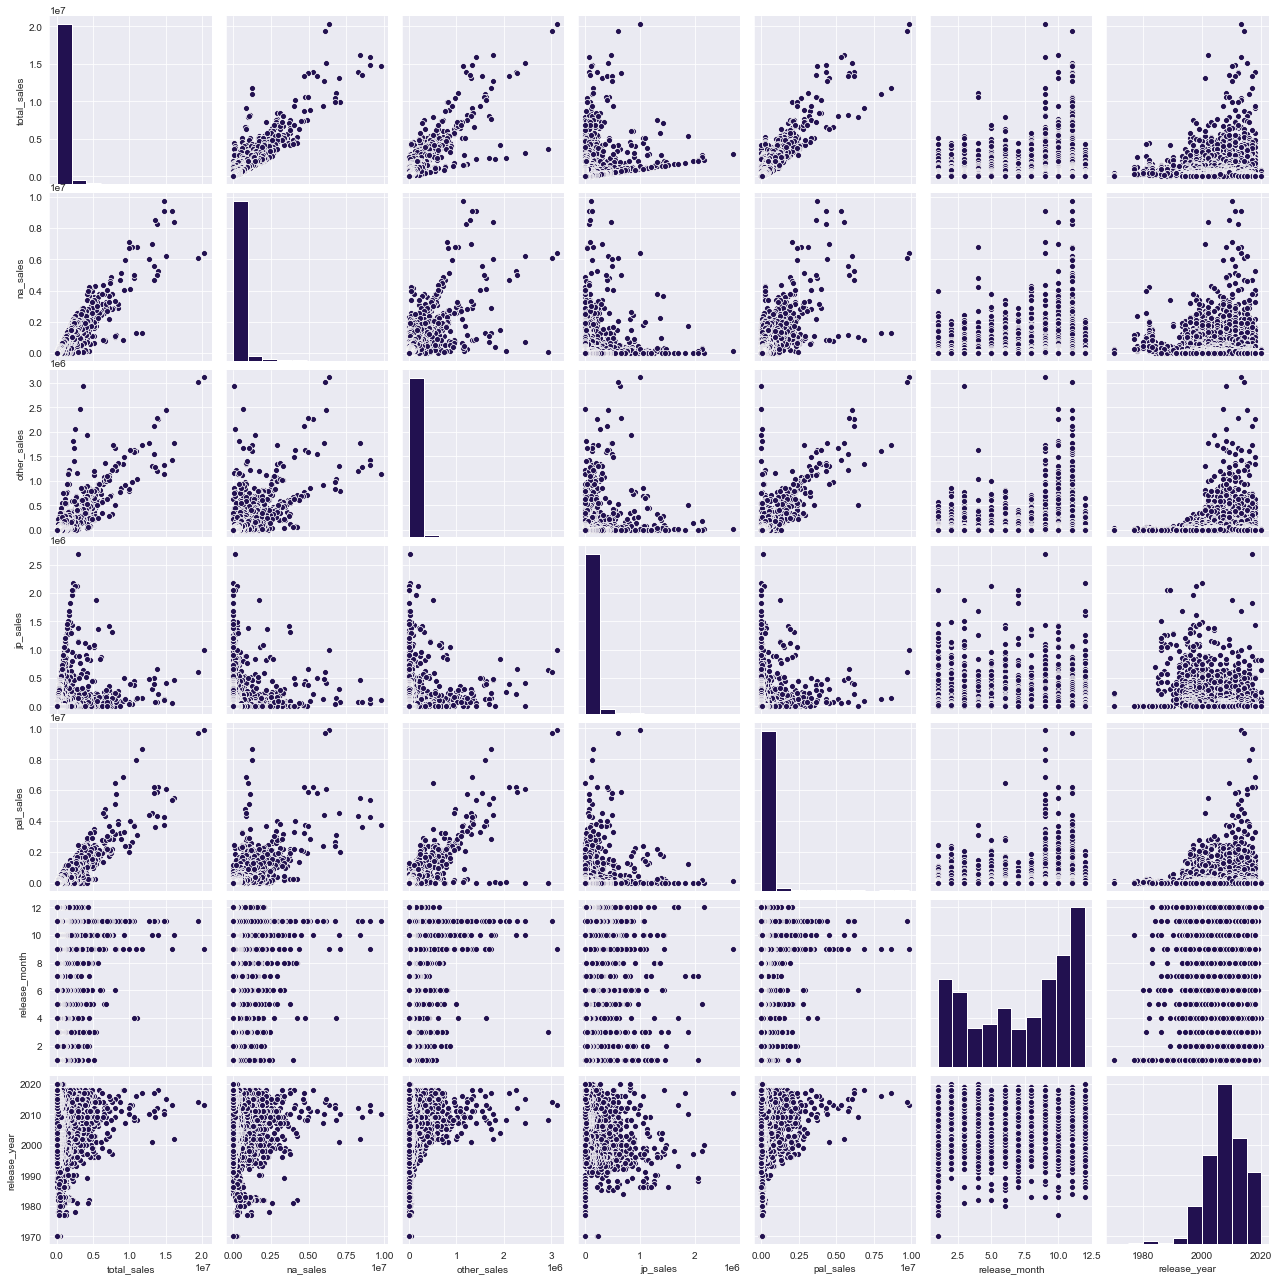

In [19]:
sns.set_style("darkgrid")
sns.set_palette("magma")
sns.pairplot(df[['total_sales','na_sales','other_sales','jp_sales','pal_sales','release_month', 'release_year']]);

<h4 style="color: blue">In terms of correlation of the variables, they are not highly correlated with each other in the heat map. <br>Only sales numbers are highly correlated with each other. <br>Higher correlations between sales figures may speak to the global nature of the video game industry: a success in one continent usually means a success in another continent as well. <br>This lends greater confidence to using just Total_Sales as the dependent target variable.<h4>


### Categorical values

- name                   
- genre                  
- platform               
- publisher              
- developer   

In [20]:
df['genre'].unique()

array(['Party', 'Simulation', 'Strategy', 'Action-Adventure',
       'Role Playing', 'Adventure', 'Sports', 'Puzzle', 'Platform',
       'Sandbox', 'MMO', 'Action', 'Shooter', 'Racing', 'Fighting',
       'Music'], dtype=object)

In [21]:
df_dummy = pd.get_dummies(data=df, columns=['platform', 'genre'])
print(df_dummy.shape)

(15775, 70)


In [22]:
#Platform grouping
df_dummy['platform_XBOX'] = df_dummy.platform_X360 | df_dummy.platform_XBL | df_dummy.platform_XOne | df_dummy.platform_XB
df_dummy['platform_PLAYSTATION'] = df_dummy.platform_PS | df_dummy.platform_PS2 | df_dummy.platform_PS3 | df_dummy.platform_PS4 | df_dummy.platform_PSN
df_dummy['platform_NS'] = df_dummy.platform_NS | df_dummy.platform_N64 | df_dummy.platform_WiiU | df_dummy.platform_Wii
df_dummy['platform_OTHER'] = df_dummy.platform_3DS | df_dummy.platform_PC | df_dummy.platform_DS | df_dummy.platform_GC | df_dummy.platform_GB  | df_dummy.platform_GBA | df_dummy.platform_SNES | df_dummy.platform_DC |df_dummy.platform_SAT |  df_dummy.platform_PSV |  df_dummy.platform_3DO |  df_dummy.platform_GEN |  df_dummy.platform_WS |  df_dummy.platform_SCD  | df_dummy.platform_OSX  | df_dummy.platform_PSN | df_dummy.platform_NES | df_dummy.platform_GBC | df_dummy.platform_PCFX | df_dummy.platform_2600 | df_dummy.platform_PCE | df_dummy.platform_VC |  df_dummy.platform_NG | df_dummy.platform_GG

In [23]:
df_dummy = df_dummy.drop(['platform_X360', 'platform_XBL', 'platform_XOne', 'platform_PS', 'platform_XB', 'platform_PSP', 'platform_PS2',
                         'platform_PS3', 'platform_PS4', 'platform_WiiU', 'platform_Wii', 'platform_N64', 
                          'platform_PSN', 'platform_3DS', 'platform_PC', 'platform_DS', 'platform_GC', 'platform_GB', 'platform_GBA', 'platform_SNES',
                          'platform_DC', 'platform_SAT', 'platform_PSV', 'platform_3DO', 'platform_GEN', 'platform_WS', 'platform_SCD',
                          'platform_OSX', 'platform_PSN', 'platform_NES', 'platform_GBC', 'platform_PCFX', 'platform_2600', 'platform_PCE', 'platform_VC', 'platform_NG', 'platform_GG'], axis=1)

### Which genre game has been released the most in a single year? 

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1596367285916' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;MostGameGenreReleasedeachyear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;MostGameGenreReleasedeachyear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;MostGameGenreReleasedeachyear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596367285916');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue">Interestingly, we have seem a shift in game trends throughout the years. <br>From the beginnings of games, from 1970s to early 1990s, there has been a fair mix of game genre created back then.<br> Titles like the Pacman to Metal Slug were simple, fun and popular games back then.  <br>Comes the mid 1990s when sports was popular, I remember game titles like NBA and FIFA was really popular back then in school. <br> Slowly evolving to the early 2000s when Action and role-playing games such as Assasin Creed and Grand Theft Auto became popular.<h4>

### Sales comparison by Genre

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1596368453000' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesVolumeComparisonbyGenre&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;SalesVolumeComparisonbyGenre' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesVolumeComparisonbyGenre&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596368453000');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue">Action games were created the most and being the most popular game genre of all, however the genre that generate the most sales is sports. <br><br> One assumption can be made is that the sports game like FIFA and NBA were produced on a yearly basis which generates more sales. <br><br> Whereas the other game titles are only re-created once every few years due to the time needed to develop game impovement and increased content.<br><br>Another assumption is that these games has many additional downloadable contents which requires the gamers to pay which in turn adds up to its over sales as well.<h4>

### Which year had the highest sales worldwide?

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1596369222720' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;YearwithHighestSalesGlobally&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;YearwithHighestSalesGlobally' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;YearwithHighestSalesGlobally&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596369222720');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue"> There was a huge increase of sales globally back in 2008 from our data and slowly decline over the years. <br><br>One possibility is that the gaming industry seems to benefit from the 2007 recession when spending on software is at record levels and games were relatively cheap form of home entertainment and therefore causing the huge spike in sales in 2008.<br><br>Additionally, with internet speed being faster, pirated games were easily available and downloaded for free, increased software piracy became a big problem, taking away massive profits from the game developers, resulting a downward trend from 2009.<br>

### Which year had the most game release?

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1596368802237' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;YearwiththeMostGameReleased&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;YearwiththeMostGameReleased' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;YearwiththeMostGameReleased&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596368802237');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue"> With the huge sales volume from 2008, it is only normal to see an upward trend of increase of games released 2009 with every game developers wanting to have the pie of share from the sales tracing back to 2008.<h4>

### Comparing between Xbox, Playstation and Nintendo Switch which generate the most sales?

In [28]:
%%HTML
<div class='tableauPlaceholder' id='viz1596392390127' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesComparisonbyPlatform&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;SalesComparisonbyPlatform' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesComparisonbyPlatform&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596392390127');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue"> From the graphs above, we can see that Playstation had the most amount of sales, and North American contributed to the most sales to all platforms.<br> <br>Based on my research, Playstation started as early as 1994, whereas Xbox was created in 2001 and therefore Playstation had a slightly higher amount of sales<br><br>Additionally, alot of Japanese games developers will only launch games based exclusively based on Playstation (since Playstation is a Japanese Product and support their own country product) which adds up to the oversales as well.<br><br> Many popular games exclusively on Playstation such as Uncharted 4, The Last of Us, Marvel's Spider-Man, Horizon Zero Dawn, and God of War which therefore making Playstation the dominent gaming console through these years.<h4>

#### Sales comparison by publisher

In [29]:
%%HTML
<div class='tableauPlaceholder' id='viz1596369529135' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;Salescomparisonbypublisher&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;Salescomparisonbypublisher' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;Salescomparisonbypublisher&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596369529135');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue"> Activision has the most number of games created, followed by Electronic Arts. <br><br> From my research, Activision started game development in 1980 and formally known as Atari where as Ubisoft only started in 1986 and therefore due to its longer history, it had been the top since then.<br><br> Activision games had few gamers but they had "super revenue generating" game title like "Call of Duty" which generated 18 billion whereas Electronic Arts top title only generates 10 billion. <h4>

### Total revenue by region

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1596369846386' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;TotalRevenuebyRegion&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;TotalRevenuebyRegion' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;TotalRevenuebyRegion&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596369846386');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue"> North American contributed to the most sales (40-50% of total sales) followed by PAL which is mainly Asia and European countries.<h4>

#### Which release month of the games generate the most sales?

In [31]:
%%HTML
<div class='tableauPlaceholder' id='viz1596369995244' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesVolume&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;SalesVolume' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesVolume&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596369995244');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue">One interesting thing to note that sales are generally higher towards the year end. <br><br>One assumption that can be made is that, due to the festive seasons like Christmas holidays happening during that period of time, more games were sold as a gifts for the christmas season and there will be free time for the gamers to play too.<h4>

In [32]:
%%HTML
<div class='tableauPlaceholder' id='viz1596391943100' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesOutliners&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capstone_15961956142290&#47;SalesOutliners' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capstone_15961956142290&#47;SalesOutliners&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596391943100');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<h4 style="color: blue">As we can see here, most of the games' are of average sales which is less than 1 million dollars and once a game got popular, it did alot more than most average games revenue, in terms several times much more than average games. One noticeable game such as Grand Theft Auto, through 4 series, a total of 235 million.<h4>

### Export Data

In [33]:
df_dummy.to_excel('dataset/vgsales_modelling.xlsx', index=False)